<a href="https://colab.research.google.com/github/m0hit-kumar/RASA/blob/main/CollabNotebook/TASC_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!unzip Corrected_data.zip


Archive:  Corrected_data.zip
replace Corrected_data/BombBlast(categorised).json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [62]:
import json
import os

all_data = []
for filename in os.listdir('Corrected_data/'):
    if filename.endswith(".json"):
        file_path = os.path.join('Corrected_data/', filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_data.extend(data)

with open("Data.json", 'w') as outfile:
    json.dump(all_data, outfile, indent=4)

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
import copy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import f1_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:

data=pd.read_json("Data.json")

In [65]:
data.head()

,text,intent
0,"About a week before the bombing, the theater'...",BombBlast
1,Search and rescue teams worked through the ni...,BombBlast
2,News photos from the aftermath of the blast s...,BombBlast
3,They will remember it all their life and will...,BombBlast
4,But the destruction of hundreds of schools is...,BombBlast


In [66]:
data["intent"].unique()

array(['BombBlast', 'Miscellaneous', 'Micscellaneous', 'Micsellaneous',
       'War', 'Micellaneous', 'miscellaneous', 'Miscellaeous',
       'Earthquake', nan, 'Tornado', 'Miscellanous', 'Miscellenous',
       'Miscelleneous', 'Volcano', 'floods', 'Miscellaenous',
       'Miscellneous'], dtype=object)

In [67]:
# checlking for nan value
data['intent'].fillna('misc', inplace=True)

data.loc[data["intent"].str.startswith("m"),"intent"]="misc"
data.loc[data["intent"].str.startswith("M"),"intent"]="misc"

In [68]:
data["intent"].unique()

array(['BombBlast', 'misc', 'War', 'Earthquake', 'Tornado', 'Volcano',
       'floods'], dtype=object)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data["text"],data["intent"],test_size=0.2, random_state=42)
len(x_train),len(x_test)

(390, 98)

In [70]:
# Data Preprocessing cleaing of data
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

In [71]:
vectorizer.fit(iter(x_train))
Xtr = vectorizer.transform(iter(x_train))
Xte = vectorizer.transform(iter(x_test))

encoder = LabelEncoder()
encoder.fit(y_train)
Ytr = encoder.transform(y_train)
Yte = encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [72]:
print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  6755
Number of features after reduction :  6755


In [73]:
def plot_me(Ytr):
  labels = list(set(Ytr))
  counts = []
  for label in labels:
      counts.append(np.count_nonzero(Ytr == label))
  plt.pie(counts, labels=labels, autopct='%1.1f%%')
  plt.show()

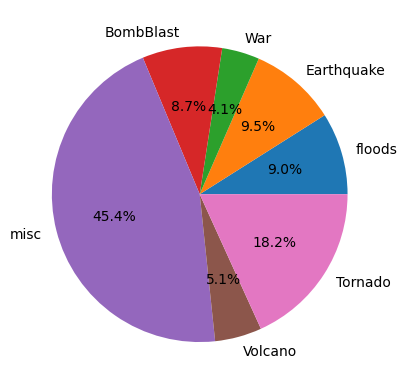

390

In [74]:
plot_me(y_train)
len(y_train)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xtr, Ytr = sm.fit_resample(Xtr, Ytr)
plot_me(Ytr)

In [75]:
# Baseline Model
dc = DummyClassifier(strategy="stratified")
dc.fit(Xtr, Ytr)
pred = dc.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.00      0.00      0.00         9
  Earthquake       0.00      0.00      0.00         8
     Tornado       0.26      0.42      0.32        12
     Volcano       0.00      0.00      0.00         0
         War       0.00      0.00      0.00         6
      floods       0.00      0.00      0.00        13
        misc       0.56      0.46      0.51        50

    accuracy                           0.29        98
   macro avg       0.12      0.13      0.12        98
weighted avg       0.32      0.29      0.30        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        12
           4       0.75      0.50      0.60         6
           5       0.67      0.62      0.64        13
           6       0.80      0.90      0.85        50

    accuracy                           0.84        98
   macro avg       0.87      0.78      0.82        98
weighted avg       0.84      0.84      0.83        98



In [78]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        12
           4       1.00      0.17      0.29         6
           5       1.00      0.38      0.56        13
           6       0.71      1.00      0.83        50

    accuracy                           0.80        98
   macro avg       0.95      0.63      0.69        98
weighted avg       0.85      0.80      0.76        98



In [79]:
# Multinomial Naive Bayesian
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       1.00      0.75      0.86         8
           2       0.65      0.92      0.76        12
           4       1.00      0.17      0.29         6
           5       1.00      0.62      0.76        13
           6       0.80      0.90      0.85        50

    accuracy                           0.80        98
   macro avg       0.86      0.69      0.71        98
weighted avg       0.83      0.80      0.78        98



In [80]:
# Support Vector Classification
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.12      0.22         8
           2       1.00      0.83      0.91        12
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        13
           6       0.57      1.00      0.73        50

    accuracy                           0.62        98
   macro avg       0.43      0.33      0.31        98
weighted avg       0.50      0.62      0.50        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
# Multilayered Perceptron
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred = mlp.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.67      0.75      0.71         8
           2       1.00      0.92      0.96        12
           4       1.00      0.17      0.29         6
           5       0.82      0.69      0.75        13
           6       0.75      0.92      0.83        50

    accuracy                           0.79        98
   macro avg       0.84      0.65      0.68        98
weighted avg       0.80      0.79      0.77        98



              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       1.00      0.75      0.86         8
           2       0.65      0.92      0.76        12
           4       1.00      0.17      0.29         6
           5       1.00      0.62      0.76        13
           6       0.80      0.90      0.85        50

    accuracy                           0.80        98
   macro avg       0.86      0.69      0.71        98
weighted avg       0.83      0.80      0.78        98



<Axes: >

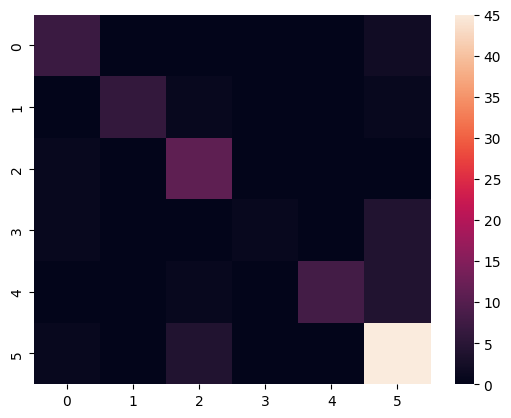

In [82]:
# Multinomial Naive Bayesian
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Yte, pred))

In [83]:
import pickle

model = dt

# Save the model to a .pkl file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# To load the model back from the .pkl file
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
